In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_columns", None)

In [291]:
data = pd.read_csv('../data/processed/cleaned_break_data.csv')
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,HOUR_IMPACTED,UNITS_IMPACTED,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,GLOBALID
2213,-80.457031,43.428716,10292,2368,2018-08-11 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,10031,WILSON AVE,43480,200.0,1958.0,CI,Y,bf37975d-156b-47b8-81ba-030465c9c8b0
1813,-80.451215,43.449210,9879,2283,2017-08-09 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,22885,CRAIG DR,8570,150.0,1987.0,DI,Y,21eb7c5a-8b3a-4966-b907-f3407ad3fdd9
822,-80.445967,43.445596,8852,1900,2014-03-15 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,11009,MIDLAND DR,89534,150.0,1965.0,CI,Y,50992363-598f-4814-be6e-ec9f78e1da98
959,-80.478531,43.480642,8993,2166,2015-12-29 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,13118,BRIDGE ST E,97272,150.0,2009.0,PVC,Y,6288aaf7-1853-48e9-b410-a3262696bcd6
881,-80.483468,43.441907,8913,2004,2014-09-23 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,11371,STIRLING AVE S,76747,150.0,1940.0,CI,Y,fbf82146-5fe8-4b0f-ac6b-216834865d5d


In [292]:
data.shape

(2544, 26)

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LONGITUDE                    2544 non-null   float64
 1   LATITUDE                     2544 non-null   float64
 2   OBJECTID                     2544 non-null   int64  
 3   WATBREAKINCIDENTID           2544 non-null   int64  
 4   INCIDENT_DATE                2544 non-null   object 
 5   BREAK_TYPE                   2544 non-null   object 
 6   HOUR_IMPACTED                2544 non-null   object 
 7   UNITS_IMPACTED               2544 non-null   object 
 8   STATUS                       2544 non-null   object 
 9   BREAK_NATURE                 2544 non-null   object 
 10  BREAK_APPARENT_CAUSE         2544 non-null   object 
 11  POSITIVE_PRESSURE_MAINTANED  2544 non-null   object 
 12  AIR_GAP_MAINTANED            2544 non-null   object 
 13  MECHANICAL_REMOVAL

In [294]:
from datetime import datetime, date
data['INCIDENT_DATE'] = pd.to_datetime(data['INCIDENT_DATE']).dt.date

In [295]:
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,HOUR_IMPACTED,UNITS_IMPACTED,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,GLOBALID
1710,-80.520591,43.418148,9772,1891,2014-04-01,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,6208,GLEN LAKE CRES,16550,150.0,1969.0,CI,Y,50618448-36a6-46d9-822e-931e3624e57d
1283,-80.442175,43.444276,9327,1734,2012-01-31,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,13188,VIEWMONT CLOSE,40130,150.0,1967.0,DI,Y,492dfc45-4149-4371-b079-8bac5ebfb2d7
472,-80.427697,43.390080,8478,1978,2014-01-10,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,50156,UNKNOWN,91992,200.0,1977.0,DI,Y,6b29d708-e81b-4808-877c-31c686c9fd8c
2520,-80.453961,43.461882,44482,144234,2021-12-03,MAIN,4-8 hours,0-50,REPAIR COMPLETED,CIRCUMFERENTIAL,FAULTY INSTALL,Y,Y,Y,Y,Y,Y,CATEGORY 1,15893,MANCHESTER RD,24860,200.0,1961.0,CI,Y,b21e3fb0-60d4-428c-9492-6d76966a9c05
1440,-80.512060,43.430099,9492,519,2000-10-03,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,20916,SPRINGBANK CRES,35630,150.0,1960.0,CI,Y,3727be53-218b-490e-9089-fa95bb8084b3


Possible columns to drop:
- Global ID
- Units Impacted
- Hours Impacted
- possibly more after further analysis...


In [296]:
data['HOUR_IMPACTED'].value_counts()

8-12 hours     2384
4-8 hours       143
20-24 hours      10
16-20 hours       5
12-16 hours       2
Name: HOUR_IMPACTED, dtype: int64

In [297]:
data['UNITS_IMPACTED'].value_counts()

0            2354
0-50          182
50-100          3
100-150         2
200-10000       2
47              1
Name: UNITS_IMPACTED, dtype: int64

Can't really see these variables being too valuable for any sort of model so we can go ahead and remove them along with Global ID

In [298]:
data.drop(['GLOBALID', 'HOUR_IMPACTED', 'UNITS_IMPACTED'], axis=1, inplace=True)

In [299]:
data.isna().sum() # just double checking even though we already cleaned the data in our other notebook

LONGITUDE                      0
LATITUDE                       0
OBJECTID                       0
WATBREAKINCIDENTID             0
INCIDENT_DATE                  0
BREAK_TYPE                     0
STATUS                         0
BREAK_NATURE                   0
BREAK_APPARENT_CAUSE           0
POSITIVE_PRESSURE_MAINTANED    0
AIR_GAP_MAINTANED              0
MECHANICAL_REMOVAL             0
FLUSHING_EXCAVATION            0
HIGHER_VELOCITY_FLUSHING       0
ANODE_INSTALLED                0
BREAK_CATEGORIZATION           0
ROADSEGMENTID                  0
STREET                         0
ASSETID                        0
ASSET_SIZE                     0
ASSET_YEAR_INSTALLED           0
ASSET_MATERIAL                 0
ASSET_EXISTS                   0
dtype: int64

In [300]:
data['ASSET_MATERIAL'].value_counts()

CI      1575
DI       531
PVC      320
PVCO      60
CPP       19
XXX       14
HDPE      11
AC         9
PVCB       2
COP        2
PE         1
Name: ASSET_MATERIAL, dtype: int64

In [301]:
data['ASSETID'].nunique()

1309

In [302]:
num_break = {}

for pipe in data['ASSETID']:
    if pipe in num_break:
        num_break[pipe] += 1
    else:
        num_break[pipe] = 1

In [303]:
data['NUM_BREAKS'] = data['ASSETID'].map(num_break)

In [304]:
data.sample(10)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,NUM_BREAKS
2301,-80.416851,43.422837,10385,2461,2019-05-15,MAIN,REPAIR COMPLETED,UNKNOWN,CORROSION,Y,Y,Y,Y,Y,Y,CATEGORY 1,22229,STONEGATE DR,36450,150.0,1976.0,DI,Y,2
2504,-80.461270,43.462090,41922,142694,2021-08-03,MAIN,REPAIR COMPLETED,UNKNOWN,UNKNOWN,Y,Y,Y,Y,Y,Y,UNKNOWN,15743,FREDERICK ST,15730,200.0,1962.0,CI,Y,3
186,-80.498207,43.437198,8182,1507,2010-10-19,MAIN,REPAIR COMPLETED,CORROSION,COMBINATION,Y,Y,Y,Y,Y,Y,CATEGORY 1,6439,PLEASANT AVE,136120,150.0,2017.0,PVCO,N,4
941,-80.511855,43.429138,8975,1021,1997-01-15,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,6282,WARREN RD,40440,150.0,1988.0,CI,Y,3
885,-80.474094,43.434020,8917,2009,2014-10-12,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,11451,COURTLAND AVE E,8370,300.0,1963.0,CI,Y,2
834,-80.459463,43.444094,8865,1913,2014-02-24,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,22848,SHELDON AVE N,34680,150.0,1946.0,CI,N,2
699,-80.443567,43.444926,8718,662,1999-01-26,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,10808,BRADLEY DR,3990,150.0,1965.0,CI,Y,7
1514,-80.473610,43.439953,9570,1151,2007-10-30,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,9382,OTTAWA ST S,29630,150.0,1923.0,CI,N,7
1700,-80.535880,43.442233,9761,916,2002-02-05,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,5510,WESTWOOD DR,42920,300.0,1969.0,DI,Y,3
636,-80.515584,43.430586,8651,2133,2015-06-06,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,20691,SILVERSPRING CRES,35030,150.0,1967.0,CI,Y,4


In [305]:
data.shape

(2544, 24)

In [306]:
data.NUM_BREAKS.sum()

8074

In [307]:
data['ASSET_YEAR_INSTALLED'] = pd.to_datetime(data['ASSET_YEAR_INSTALLED'], format='%Y').dt.date

In [308]:
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,NUM_BREAKS
303,-80.507940,43.422434,8304,1218,2008-04-05,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,6515,SWEETBRIAR DR,37210,150.0,1962-01-01,DI,Y,4
1745,-80.517244,43.423261,9809,971,2001-11-23,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,6142,UPLANDS DR,38850,150.0,1974-01-01,CI,Y,4
690,-80.527260,43.445969,8707,688,1997-11-06,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,8730,INWOOD DR,20440,150.0,1966-01-01,CI,Y,1
68,-80.519481,43.432413,8058,1866,2013-01-30,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,COMBINATION,Y,Y,Y,Y,Y,Y,CATEGORY 1,20698,OVERLEA DR,29790,150.0,1967-01-01,CI,Y,6
2324,-80.443485,43.461642,10423,2436,2019-02-27,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,15817,CONFEDERATION DR,7770,150.0,1966-01-01,CI,Y,3


In [309]:
data['ASSET_YEAR_INSTALLED'].min()

datetime.date(1889, 1, 1)

In [310]:
data['ASSET_YEAR_INSTALLED'].max()

datetime.date(2018, 1, 1)

In [311]:
data['INCIDENT_DATE'].min()

datetime.date(1985, 1, 1)

In [312]:
data['AGE'] = (np.floor((pd.to_datetime(data['INCIDENT_DATE']) - 
                        pd.to_datetime(data['ASSET_YEAR_INSTALLED'])).dt.days / 365.25)).astype(int)

# the following code is something I found on stack overflow that
# helped me calculate the age in years of each pipe

# df['age'] = (np.floor((pd.to_datetime(df['dte']) - 
#              pd.to_datetime(dob)).dt.days / 365.25)).astype(int)

In [313]:
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,NUM_BREAKS,AGE
527,-80.472721,43.455122,8535,1936,2014-02-10,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,9781,CHAPEL ST,6490,150.0,1953-01-01,CI,Y,2,61
902,-80.459877,43.451154,8934,2026,2014-12-11,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,22915,BURBANK RD,5040,150.0,1958-01-01,CI,Y,4,56
580,-80.496158,43.428896,8593,369,2003-02-02,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,6453,STIRLING AVE S,36240,300.0,1957-01-01,CI,Y,2,46
1306,-80.449349,43.444258,9352,834,1999-10-04,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,10193,EASTWOOD DR,11170,150.0,1967-01-01,DI,Y,2,32
2402,-80.438596,43.415564,23362,193717,2020-03-05,MAIN,REPAIR COMPLETED,UNKNOWN,UNKNOWN,Y,Y,Y,Y,Y,Y,UNKNOWN,10697,GOODRICH DR,58170,1200.0,1989-01-01,CPP,Y,2,31


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LONGITUDE                    2544 non-null   float64
 1   LATITUDE                     2544 non-null   float64
 2   OBJECTID                     2544 non-null   int64  
 3   WATBREAKINCIDENTID           2544 non-null   int64  
 4   INCIDENT_DATE                2544 non-null   object 
 5   BREAK_TYPE                   2544 non-null   object 
 6   STATUS                       2544 non-null   object 
 7   BREAK_NATURE                 2544 non-null   object 
 8   BREAK_APPARENT_CAUSE         2544 non-null   object 
 9   POSITIVE_PRESSURE_MAINTANED  2544 non-null   object 
 10  AIR_GAP_MAINTANED            2544 non-null   object 
 11  MECHANICAL_REMOVAL           2544 non-null   object 
 12  FLUSHING_EXCAVATION          2544 non-null   object 
 13  HIGHER_VELOCITY_FL

In [315]:
data.columns = data.columns.str.lower()

In [316]:
data.columns

Index(['longitude', 'latitude', 'objectid', 'watbreakincidentid',
       'incident_date', 'break_type', 'status', 'break_nature',
       'break_apparent_cause', 'positive_pressure_maintaned',
       'air_gap_maintaned', 'mechanical_removal', 'flushing_excavation',
       'higher_velocity_flushing', 'anode_installed', 'break_categorization',
       'roadsegmentid', 'street', 'assetid', 'asset_size',
       'asset_year_installed', 'asset_material', 'asset_exists', 'num_breaks',
       'age'],
      dtype='object')

In [317]:
data['status'].value_counts()

REPAIR COMPLETED       2526
CANCELLED                16
UNDER INVESTIGATION       2
Name: status, dtype: int64

In [318]:
data.drop('status', axis=1, inplace=True)

In [319]:
data['break_type'].value_counts()

MAIN       2524
SERVICE      20
Name: break_type, dtype: int64

In [320]:
data['break_nature'].value_counts()

UNKNOWN                                      1998
CIRCUMFERENTIAL                               338
CORROSION                                      72
FITTING/JOINT                                  50
LONGITUDINAL                                   29
CIRCUMFERENTIAL AND FITTING/JOINT              23
CORROSION AND CIRCUMFERENTIAL                  14
WATER SERVICE                                   6
CORROSION AND LONGITUDINAL                      6
CORROSION AND FITTING/JOINT                     5
FITTING/JOINT AND LONGITUDINAL                  2
CORROSION - ROBAR SADDLE CORRODED AT SEAM       1
Name: break_nature, dtype: int64

In [321]:
data['break_apparent_cause'].value_counts()

OTHER             1907
AGE                196
UNKNOWN            153
COMBINATION        141
CORROSION           98
SOILS               21
PRESSURE            21
FAULTY INSTALL       7
Name: break_apparent_cause, dtype: int64

In [322]:
data.sample(5)

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,asset_exists,num_breaks,age
2399,-80.528681,43.446317,22721,193557,2020-02-27,MAIN,CIRCUMFERENTIAL,UNKNOWN,Y,Y,Y,Y,Y,Y,CATEGORY 1,8732,WESTWOOD CRES,42890,150.0,1966-01-01,CI,Y,6,54
1632,-80.455376,43.437361,9692,1044,2003-04-17,MAIN,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,10030,WEBER ST E,62030,300.0,1999-01-01,PVC,Y,1,4
1124,-80.515990,43.450160,9161,2104,2015-01-15,MAIN,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,1260,BELMONT AVE W,78900,300.0,1974-01-01,DI,Y,4,41
2174,-80.527868,43.446930,10252,2395,2018-11-26,MAIN,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,8717,INWOOD DR,20420,150.0,1966-01-01,DI,Y,2,52
1702,-80.525780,43.449038,9763,300,1998-03-02,MAIN,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,8724,ORCHARD PARK CRES,29110,100.0,1955-01-01,CI,N,1,43


We can see that we've got 7 columns where there are what we can call "binary" values - Y (yes) & N (no). We're going to one-hot encode these variables so we can start to put the data into proper modeling format but first, we'll double check to make sure that there are only 2 values for each column.

In [323]:
binary_cols = data[['positive_pressure_maintaned', 'air_gap_maintaned', 'mechanical_removal', 
                    'flushing_excavation', 'higher_velocity_flushing', 'anode_installed', 'asset_exists']]
for col in binary_cols:
    print(binary_cols[col].value_counts())

Y    2540
N       4
Name: positive_pressure_maintaned, dtype: int64
Y    2540
N       4
Name: air_gap_maintaned, dtype: int64
Y    2531
N      13
Name: mechanical_removal, dtype: int64
Y    2536
N       8
Name: flushing_excavation, dtype: int64
Y    2539
N       5
Name: higher_velocity_flushing, dtype: int64
Y    2500
N      44
Name: anode_installed, dtype: int64
Y    2005
N     539
Name: asset_exists, dtype: int64


In [324]:
binary_cols = ['positive_pressure_maintaned', 'air_gap_maintaned', 'mechanical_removal', 
                    'flushing_excavation', 'higher_velocity_flushing', 'anode_installed', 'asset_exists']

data = pd.get_dummies(data, columns=binary_cols, drop_first=True)

In [325]:
data.sample(5)

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned_Y,air_gap_maintaned_Y,mechanical_removal_Y,flushing_excavation_Y,higher_velocity_flushing_Y,anode_installed_Y,asset_exists_Y
819,-80.505572,43.425147,8848,603,2005-11-30,MAIN,UNKNOWN,OTHER,CATEGORY 1,6237,STONYBROOK DR,36520,150.0,1962-01-01,CI,2,43,1,1,1,1,1,1,1
486,-80.423921,43.433374,8493,1994,2014-06-03,MAIN,UNKNOWN,OTHER,CATEGORY 1,70531,CHICOPEE TERR,7140,150.0,1965-01-01,DI,3,49,1,1,1,1,1,1,1
978,-80.501161,43.435789,9013,2053,2015-03-05,MAIN,UNKNOWN,OTHER,CATEGORY 1,20982,SOUTH DR,35230,150.0,1950-01-01,CI,2,65,1,1,1,1,1,1,1
1925,-80.521741,43.426478,9995,1078,2007-02-03,MAIN,CIRCUMFERENTIAL,OTHER,CATEGORY 1,6180,FISCHER HALLMAN RD,68711,150.0,2009-01-01,PVC,2,-2,1,1,1,1,1,1,0
630,-80.525841,43.445800,8643,943,1999-01-13,MAIN,UNKNOWN,OTHER,CATEGORY 1,1314,WESTWOOD DR,43030,300.0,1971-01-01,CI,3,28,1,1,1,1,1,1,1


In [326]:
binary_cols = data[['positive_pressure_maintaned_Y', 'air_gap_maintaned_Y', 'mechanical_removal_Y', 
                    'flushing_excavation_Y', 'higher_velocity_flushing_Y', 'anode_installed_Y', 'asset_exists_Y']]
for col in binary_cols:
    print(binary_cols[col].value_counts())

1    2540
0       4
Name: positive_pressure_maintaned_Y, dtype: int64
1    2540
0       4
Name: air_gap_maintaned_Y, dtype: int64
1    2531
0      13
Name: mechanical_removal_Y, dtype: int64
1    2536
0       8
Name: flushing_excavation_Y, dtype: int64
1    2539
0       5
Name: higher_velocity_flushing_Y, dtype: int64
1    2500
0      44
Name: anode_installed_Y, dtype: int64
1    2005
0     539
Name: asset_exists_Y, dtype: int64


In [327]:
data = data.rename(columns={'positive_pressure_maintaned_Y': 'positive_pressure_maintaned',
                            'air_gap_maintaned_Y': 'air_gap_maintaned',
                            'mechanical_removal_Y': 'mechanical_removal',
                            'flushing_excavation_Y': 'flushing_excavation',
                            'higher_velocity_flushing_Y': 'higher_velocity_flushing',
                            'anode_installed_Y': 'anode_installed',
                            'asset_exists_Y': 'asset_exists'})

Columns to transform still:
- break type
- break nature
- break apparent cause
- break categorization
- asset material
- maybe think about dropping the street name since that would only be for EDA use

In [328]:
cat_cols = data[['break_type', 'break_nature', 'break_apparent_cause',
                 'break_categorization', 'asset_material']]

for col in cat_cols:
    print(cat_cols[col].value_counts(), "\n" + "-"*55)

MAIN       2524
SERVICE      20
Name: break_type, dtype: int64 
-------------------------------------------------------
UNKNOWN                                      1998
CIRCUMFERENTIAL                               338
CORROSION                                      72
FITTING/JOINT                                  50
LONGITUDINAL                                   29
CIRCUMFERENTIAL AND FITTING/JOINT              23
CORROSION AND CIRCUMFERENTIAL                  14
WATER SERVICE                                   6
CORROSION AND LONGITUDINAL                      6
CORROSION AND FITTING/JOINT                     5
FITTING/JOINT AND LONGITUDINAL                  2
CORROSION - ROBAR SADDLE CORRODED AT SEAM       1
Name: break_nature, dtype: int64 
-------------------------------------------------------
OTHER             1907
AGE                196
UNKNOWN            153
COMBINATION        141
CORROSION           98
SOILS               21
PRESSURE            21
FAULTY INSTALL       7
Name: 

I'll break down what I'm thinking for how I'm going to encode these columns:

Break type is easy and I'll just one hot encode it or use `get_dummies`. Break nature is going to be a little trickier since it has high cardinality/dimensionality. I think I'm going to combine the features that have matching break nature as the first name for the feature. For example - `CIRCUMFERENTIAL AND FITTING/JOINT` will be added to `CIRCUMFERENTIAL`. `CORROSION` has a lot of subcategories and so all of those will be joined into the original `CORROSION` column. Lastly `FITTING/JOINT AND LONGITUDINAL` will be added to `FITTING/JOINT`.

For break apparent cause I'll add the `UNKNOWN` values into `OTHER` to be consistent since `OTHER` is the majority value.

Break categorization is relatively easy as well and I can OH encode them or use `get_dummies` again.

I'm currently doing some digging on the different asset materials to see what can be done for these values. I'm already doubting I can combine any since they represent unique pipe materials but maybe research will help turn something up.
- CI = Cast Iron
- DI = Ductile Iron
- PVC = Polyvinyl Chloride
- PVCO = Molecularly Oriented PVC
- CPP = Concrete Pressure Pipe
- XXX = this one is still a mystery
- HDPE = High-density Polyethylene
- AC = Asbestos Cement
- PVCB = not exactly sure what this could be. A google search turns up only these types of PVC pipes:
    - Unplasticized PVC (PVC-U)
    - Chlorinated PVC (C-PVC)
    - Molecularly oriented (PVC-O)
    - High-impact PVC (PVC-Hi)
- COP = Copper
- PE = polyethylene

In [329]:
data['break_nature'] = data['break_nature'].replace(['CIRCUMFERENTIAL AND FITTING/JOINT'], 'CIRCUMFERENTIAL')
data['break_nature'] = data['break_nature'].replace(['CORROSION AND CIRCUMFERENTIAL',
                                                         'CORROSION AND LONGITUDINAL',
                                                         'CORROSION AND FITTING/JOINT',
                                                         'CORROSION - ROBAR SADDLE CORRODED AT SEAM'], 'CORROSION')
data['break_nature'] = data['break_nature'].replace(['FITTING/JOINT AND LONGITUDINAL'], 'FITTING/JOINT')

In [330]:
data.break_nature.value_counts()

UNKNOWN            1998
CIRCUMFERENTIAL     361
CORROSION            98
FITTING/JOINT        52
LONGITUDINAL         29
WATER SERVICE         6
Name: break_nature, dtype: int64

In [331]:
data['break_apparent_cause'] = data['break_apparent_cause'].replace(['UNKNOWN'], 'OTHER')

In [332]:
data.break_apparent_cause.value_counts()

OTHER             2060
AGE                196
COMBINATION        141
CORROSION           98
SOILS               21
PRESSURE            21
FAULTY INSTALL       7
Name: break_apparent_cause, dtype: int64

In [333]:
data['age'].describe()

count    2544.000000
mean       39.938679
std        23.414258
min       -33.000000
25%        33.000000
50%        45.000000
75%        54.000000
max       124.000000
Name: age, dtype: float64

In [334]:
num_neg = [age for age in data['age'] if age < 0]

In [335]:
len(num_neg)

320

In [336]:
import seaborn as sns

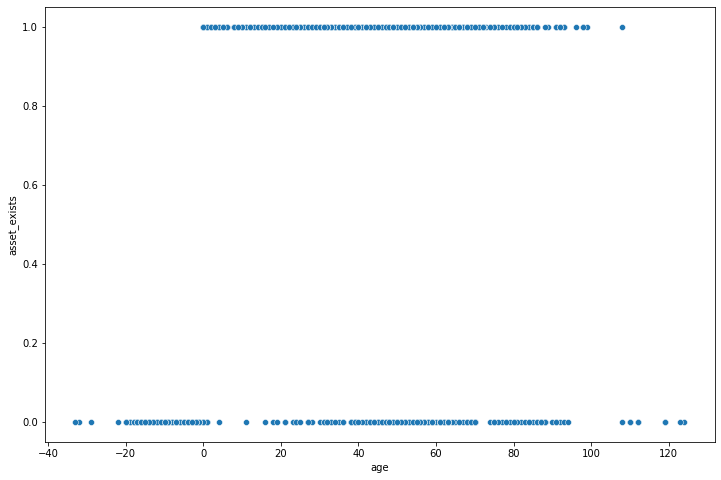

In [337]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='age', y='asset_exists')
plt.show();

I wanted to see what the range for the negative ages were since there are a decent amount of negative ages. The possibility of ages to be negative is from the replacement of the pipes since their last break. For instance, the one pipe had a break in 2001 but was replaced in 2006 so it has an age of -5.

Technically what I could do is remove all instances where the asset does not exist since we're only insterested in predicting the failure of an existing pipe.

In [338]:
connections = {}

for pipe in data['roadsegmentid']:
    if pipe in connections:
        connections[pipe] += 1
    else:
        connections[pipe] = 1
        
data['connections'] = data['roadsegmentid'].map(connections)

In [339]:
data.sample(5)

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
40,-80.441809,43.442225,8029,741,1997-09-05,MAIN,UNKNOWN,OTHER,CATEGORY 1,13197,RENNIE DR,32170,150.0,1963-01-01,CI,5,34,1,1,1,1,1,1,1,5
440,-80.473863,43.482325,8442,635,2001-01-24,MAIN,UNKNOWN,OTHER,CATEGORY 1,40257,BLOOMINGDALE RD,3450,300.0,1964-01-01,CI,1,37,1,1,1,1,1,1,1,1
379,-80.515917,43.413114,8380,6,1998-12-18,MAIN,UNKNOWN,OTHER,CATEGORY 1,9503,OTTAWA ST S,64330,450.0,1952-01-01,AC,2,46,1,1,1,1,1,1,1,2
1407,-80.509593,43.421858,9458,594,2005-03-26,MAIN,UNKNOWN,OTHER,CATEGORY 1,6515,SWEETBRIAR DR,37210,150.0,1962-01-01,DI,4,43,1,1,1,1,1,1,1,4
429,-80.515246,43.433059,8431,781,2005-01-03,MAIN,UNKNOWN,OTHER,CATEGORY 1,20727,CECILE DR,5830,150.0,1966-01-01,DI,6,39,1,1,1,1,1,1,1,6


In [340]:
data.roadsegmentid.value_counts()

11697    15
11696    13
10015    11
12610    11
6499     11
         ..
11438     1
9952      1
13118     1
9937      1
70501     1
Name: roadsegmentid, Length: 1118, dtype: int64

In [341]:
data['roadsegmentid'].value_counts().describe()

count    1118.000000
mean        2.275492
std         1.864513
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: roadsegmentid, dtype: float64

I really want to start doing some baseline models now so I'm going to create possibly a few subsets containing different features, process them if needed, and then fit and train them.

In [342]:
data['incident_date'] = pd.to_datetime(data['incident_date'])
data['incident_date'].sample(1)

2043   2011-03-02
Name: incident_date, dtype: datetime64[ns]

In [343]:
data['asset_year_installed'] = pd.to_datetime(data['asset_year_installed'])

In [344]:
data['incident_date'].dt.year.value_counts()

2003    143
2011    137
2015    134
2014    132
2010    125
2000    119
2007    119
1999    117
2002    115
2013    105
1998    102
2005    102
2001    100
1997     94
2009     94
2018     89
2004     88
2019     88
2006     82
2008     81
2021     81
2017     78
2020     72
2016     68
2012     56
2022     13
1985      3
1987      2
1986      1
1996      1
1995      1
1991      1
1992      1
Name: incident_date, dtype: int64

In [345]:
data['asset_exists'].value_counts()

1    2005
0     539
Name: asset_exists, dtype: int64

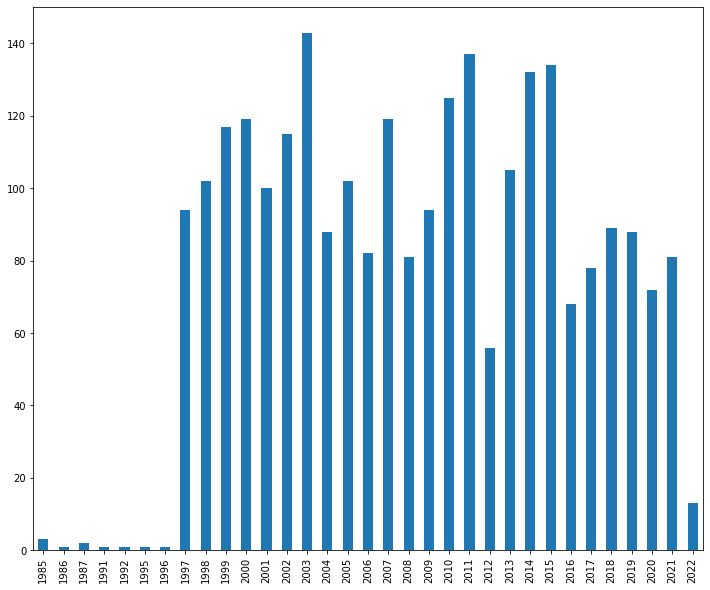

In [346]:
# display the number of breaks per year with seaborn
plt.figure(figsize=(12, 10))
data['incident_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.show();

In [347]:
breaks_per_year = pd.Series(data['incident_date'].dt.year.value_counts().sort_index())
breaks_per_year.index

Int64Index([1985, 1986, 1987, 1991, 1992, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

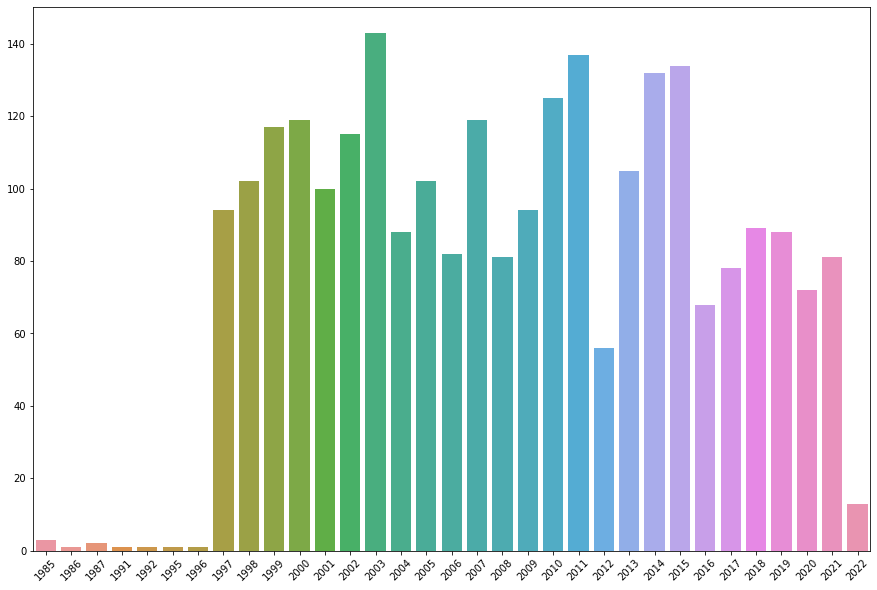

In [348]:
plt.figure(figsize=(15, 10))
sns.barplot(x=breaks_per_year.index, y=breaks_per_year.values)
plt.xticks(rotation=45)
plt.show();

Let's drop observations where the asset doesn't exist.

In [349]:
# shape before dropping
print(data.shape)
data = data[data['asset_exists'] == 1]
# shape after dropping
print(data.shape)

(2544, 25)
(2005, 25)


In [350]:
data.head()

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
0,-80.484005,43.462939,1,2252,2017-12-01,MAIN,CORROSION,AGE,CATEGORY 2,6961,LANCASTER ST W,134292,450.0,1937-01-01,CI,1,80,0,0,0,0,1,1,1,3
1,-80.515075,43.422742,7874,1311,2001-03-26,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6116,CLOVERDALE CRES,4101323,13.0,1965-01-01,XXX,1,36,1,1,1,1,1,1,1,7
2,-80.439811,43.445067,7875,1325,2006-09-06,SERVICE,UNKNOWN,OTHER,CATEGORY 1,13207,WREN CRES,4099987,25.0,1967-01-01,XXX,1,39,1,1,1,1,1,1,1,1
3,-80.510859,43.426478,7876,1328,2006-09-11,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6498,GREENBROOK DR,4642530,25.0,1964-01-01,PVC,1,42,1,1,1,1,1,1,1,3
4,-80.457520,43.443201,7877,1308,2000-01-27,SERVICE,UNKNOWN,OTHER,CATEGORY 1,22846,MONTGOMERY RD,4100648,25.0,1967-01-01,XXX,1,33,1,1,1,1,1,1,1,1


In [351]:
# drop watbreakincidentid
data.drop('watbreakincidentid', axis=1, inplace=True)

In [352]:
data.head()

,longitude,latitude,objectid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
0,-80.484005,43.462939,1,2017-12-01,MAIN,CORROSION,AGE,CATEGORY 2,6961,LANCASTER ST W,134292,450.0,1937-01-01,CI,1,80,0,0,0,0,1,1,1,3
1,-80.515075,43.422742,7874,2001-03-26,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6116,CLOVERDALE CRES,4101323,13.0,1965-01-01,XXX,1,36,1,1,1,1,1,1,1,7
2,-80.439811,43.445067,7875,2006-09-06,SERVICE,UNKNOWN,OTHER,CATEGORY 1,13207,WREN CRES,4099987,25.0,1967-01-01,XXX,1,39,1,1,1,1,1,1,1,1
3,-80.510859,43.426478,7876,2006-09-11,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6498,GREENBROOK DR,4642530,25.0,1964-01-01,PVC,1,42,1,1,1,1,1,1,1,3
4,-80.457520,43.443201,7877,2000-01-27,SERVICE,UNKNOWN,OTHER,CATEGORY 1,22846,MONTGOMERY RD,4100648,25.0,1967-01-01,XXX,1,33,1,1,1,1,1,1,1,1


Let's encode our categorical variables and start to save the data as a separate set so we keep some originality for the EDA.

Categories to encode:
- `break_type`
- `break_nature`
- `break_apparent_cause`
- `break_categorization`
- `asset_material`

In [353]:
data['objectid'].nunique()

2005

In [354]:
data_copy = data.copy()
data_copy.drop(['objectid', 'street', 'assetid'], axis=1, inplace=True)

In [355]:
# make sure there aren't any negative ages anymore
data_copy['age'].describe()

count    2005.000000
mean       46.157107
std        13.984656
min         0.000000
25%        38.000000
50%        46.000000
75%        55.000000
max       108.000000
Name: age, dtype: float64

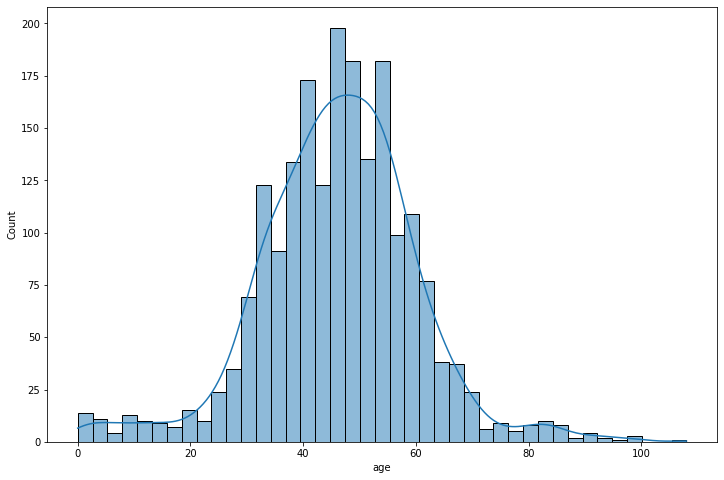

In [356]:
plt.figure(figsize=(12, 8))
sns.histplot(data_copy['age'], kde=True)
plt.show();

I'll visualize all of the unique values for each category that needs to be encoded so I know how many different values are in each column. I could get dummy variables for the categories but that would increase the feature space more than I would like. I thought about just creating a dictionary of each column with corresponding values and mapping them to the column but this could also be time consuming. Let's try and use pandas to our advantage here and convert each column to a category and call the `cat.codes` on them, this is known as label encoding.

In [357]:
cat_features = data_copy[['break_type', 'break_nature', 'break_apparent_cause', 'break_categorization', 'asset_material']]

for feature in cat_features:
    print(data_copy[feature].value_counts())
    print('-'*30)

MAIN       1988
SERVICE      17
Name: break_type, dtype: int64
------------------------------
UNKNOWN            1550
CIRCUMFERENTIAL     318
CORROSION            80
FITTING/JOINT        28
LONGITUDINAL         24
WATER SERVICE         5
Name: break_nature, dtype: int64
------------------------------
OTHER             1598
AGE                162
COMBINATION        116
CORROSION           89
PRESSURE            19
SOILS               16
FAULTY INSTALL       5
Name: break_apparent_cause, dtype: int64
------------------------------
CATEGORY 1    1905
UNKNOWN         92
CATEGORY 2       8
Name: break_categorization, dtype: int64
------------------------------
CI      1417
DI       488
PVC       57
XXX       14
CPP       14
AC         9
PVCO       3
COP        2
HDPE       1
Name: asset_material, dtype: int64
------------------------------


In [358]:
for feature in data_copy[['break_type', 'break_nature', 'break_apparent_cause', 'break_categorization', 'asset_material']]:
    data_copy[feature] = data_copy[feature].astype('category')
    data_copy[feature] = data_copy[feature].cat.codes


In [359]:
data_copy.head()

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
0,-80.484005,43.462939,2017-12-01,0,1,0,1,6961,450.0,1937-01-01,1,1,80,0,0,0,0,1,1,1,3
1,-80.515075,43.422742,2001-03-26,1,4,4,0,6116,13.0,1965-01-01,8,1,36,1,1,1,1,1,1,1,7
2,-80.439811,43.445067,2006-09-06,1,4,4,0,13207,25.0,1967-01-01,8,1,39,1,1,1,1,1,1,1,1
3,-80.510859,43.426478,2006-09-11,1,4,4,0,6498,25.0,1964-01-01,6,1,42,1,1,1,1,1,1,1,3
4,-80.457520,43.443201,2000-01-27,1,4,4,0,22846,25.0,1967-01-01,8,1,33,1,1,1,1,1,1,1,1


In [360]:
cat_features = data_copy[['break_type', 'break_nature', 'break_apparent_cause', 'break_categorization', 'asset_material']]

for feature in cat_features:
    print(data_copy[feature].value_counts())
    print('-'*30)

0    1988
1      17
Name: break_type, dtype: int64
------------------------------
4    1550
0     318
1      80
2      28
3      24
5       5
Name: break_nature, dtype: int64
------------------------------
4    1598
0     162
1     116
2      89
5      19
6      16
3       5
Name: break_apparent_cause, dtype: int64
------------------------------
0    1905
2      92
1       8
Name: break_categorization, dtype: int64
------------------------------
1    1417
4     488
6      57
8      14
3      14
0       9
7       3
2       2
5       1
Name: asset_material, dtype: int64
------------------------------


In [361]:
data_copy.drop('roadsegmentid', axis=1, inplace=True)

In [362]:
data_copy.head()

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections
0,-80.484005,43.462939,2017-12-01,0,1,0,1,450.0,1937-01-01,1,1,80,0,0,0,0,1,1,1,3
1,-80.515075,43.422742,2001-03-26,1,4,4,0,13.0,1965-01-01,8,1,36,1,1,1,1,1,1,1,7
2,-80.439811,43.445067,2006-09-06,1,4,4,0,25.0,1967-01-01,8,1,39,1,1,1,1,1,1,1,1
3,-80.510859,43.426478,2006-09-11,1,4,4,0,25.0,1964-01-01,6,1,42,1,1,1,1,1,1,1,3
4,-80.457520,43.443201,2000-01-27,1,4,4,0,25.0,1967-01-01,8,1,33,1,1,1,1,1,1,1,1


In [363]:
data_copy['asset_size'].value_counts()

150.0     1408
200.0      242
300.0      231
450.0       45
100.0       42
25.0        10
600.0        7
50.0         6
1200.0       5
250.0        4
13.0         3
750.0        2
Name: asset_size, dtype: int64

In [364]:
data_copy.rename(columns={'age': 'age_at_break'}, inplace=True)

/Users/jordansamek/opt/miniconda3/envs/baseline_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


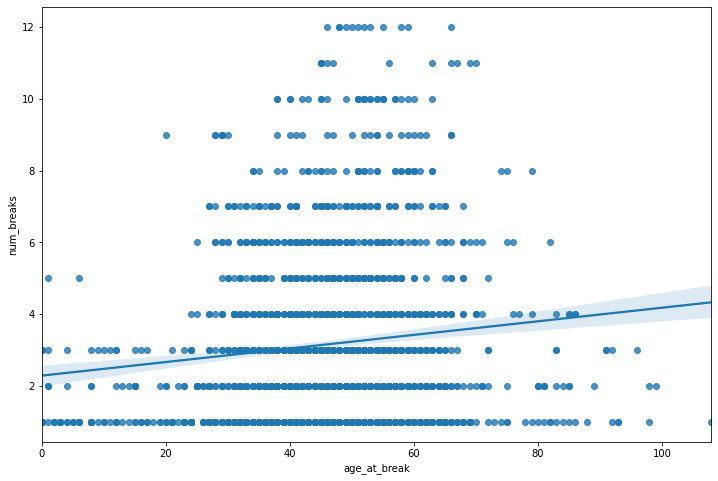

In [365]:
plt.figure(figsize=(12, 8))
sns.regplot(data_copy['age_at_break'], data_copy['num_breaks'])
plt.show();

In [366]:
data_copy['num_breaks'].describe()

count    2005.000000
mean        3.166085
std         2.328091
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        12.000000
Name: num_breaks, dtype: float64

In [367]:
data_copy['age_at_break'].describe()

count    2005.000000
mean       46.157107
std        13.984656
min         0.000000
25%        38.000000
50%        46.000000
75%        55.000000
max       108.000000
Name: age_at_break, dtype: float64

In [374]:
max_age = data_copy['age_at_break'].max()
num_breaks_max_age = data_copy['num_breaks'].loc[data_copy['age_at_break'] == max_age]

max_age_failure_rate = num_breaks_max_age / max_age

print(max_age_failure_rate)

1253    0.009259
Name: num_breaks, dtype: float64


In [375]:
# how many values have age_at_break = 0
data_copy['age_at_break'].loc[data_copy['age_at_break'] == 0].count()

6

In [368]:
# calculate the failure rate from num_breaks and age
data_copy['failure_rate'] = round(data_copy['num_breaks'] / data_copy['age_at_break'], 2)
data_copy.sample(5)

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,connections,failure_rate
869,-80.456765,43.434317,2006-11-12,0,4,4,0,150.0,1957-01-01,1,4,49,1,1,1,1,1,1,1,4,8.16
1819,-80.513858,43.456809,2015-04-04,0,4,4,0,150.0,1923-01-01,1,1,92,1,1,1,1,1,1,1,1,1.09
1194,-80.503859,43.432394,2010-01-26,0,3,5,0,150.0,1956-01-01,1,7,54,1,1,1,1,1,1,1,7,12.96
1701,-80.462633,43.455541,2002-02-07,0,4,4,0,150.0,1955-01-01,1,1,47,1,1,1,1,1,1,1,2,2.13
1386,-80.443821,43.439285,2003-02-22,0,4,4,0,150.0,1965-01-01,1,2,38,1,1,1,1,1,1,1,2,5.26


In [369]:
data_copy['age_at_break'].describe()

count    2005.000000
mean       46.157107
std        13.984656
min         0.000000
25%        38.000000
50%        46.000000
75%        55.000000
max       108.000000
Name: age_at_break, dtype: float64

In [370]:
data_copy['connections'].describe()

count    2005.000000
mean        3.744140
std         2.592572
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        15.000000
Name: connections, dtype: float64

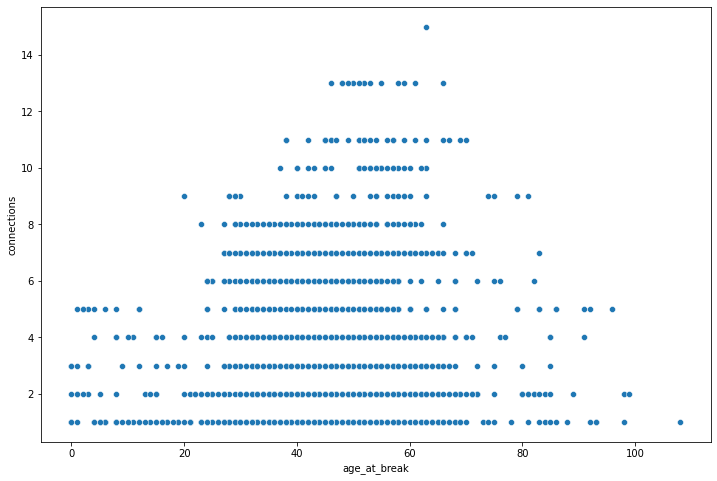

In [371]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_copy, x='age_at_break', y='connections')
plt.show();

In [372]:
data_copy['failure_rate'].describe()

count    2005.00
mean         inf
std          NaN
min         0.93
25%         3.12
50%         5.71
75%        10.00
max          inf
Name: failure_rate, dtype: float64